## Import required Libraries

In [2]:
#pip install kmodes
import pickle

In [ ]:
import pandas as pd
import numpy as np


## Load and review data

In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

### Data Preprocessing starts

In [6]:
#Remove following columns
df=df.drop(labels=['User_ID','Product_ID'], axis=1)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


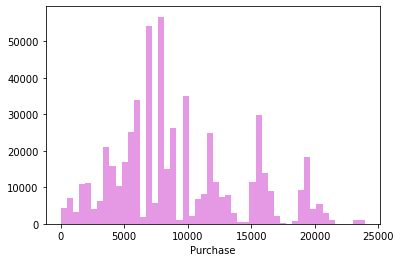

In [7]:
import matplotlib.pyplot as plt # import library for making plots
import seaborn as sns
sns.distplot(df['Purchase'],kde=False,color='m')
plt.show()

In [8]:
#Handle Outliers-as of now removing outliers
import numpy as np

# IQR
Q1 = np.percentile(df['Purchase'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Purchase'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ",df.shape)
 
# Upper bound
upper = np.where(df['Purchase'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Purchase'] <= (Q1-1.5*IQR))
 
#''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (550068, 10)
New Shape:  (547391, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


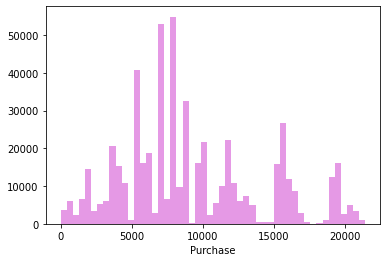

In [9]:
#Plot after removing outliers
sns.distplot(df['Purchase'],kde=False,color='m')
plt.show()

In [10]:
######Null Check
null_counts=df.isna().sum()
print(null_counts)
#Product Category 2 and 3 are having Null values ,but these columns are not useful in predcing the purchase amount. 
#So we will be dropping certain columns after the exploratory analysis which we carried out previously.

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173226
Product_Category_3            381211
Purchase                           0
dtype: int64


In [11]:
#Remove Product Id 2 and Product Category 3 columns
df.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)

In [12]:
#Divide into labels and features
Y=df['Purchase']
X=df.drop(['Purchase'],axis=1)

In [14]:
#Assigning numerical values to Age Categories
dic_to_replace = {"Age": {"0-17": 1, "18-25": 2,"26-35": 3,"36-45": 4,"46-50":5,"51-55":6,"55+": 7},
                  "Stay_In_Current_City_Years":{"4+":5}}
X.replace(dic_to_replace, inplace=True)

In [15]:
X['Stay_In_Current_City_Years']=X['Stay_In_Current_City_Years'].astype('int64')
#only run below for clustering
X['Marital_Status']=X['Marital_Status'].astype('object')
X['Occupation']=X['Occupation'].astype('object')
X['Product_Category_1']=X['Product_Category_1'].astype('object')

### Data Preprocessing ends

### Divide the complete dataset into different clusters and store it in respective files

In [17]:
#Run clusters . Going for 3 clusters 
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=2)
clusters_label = kproto.fit_predict(X, categorical=[0, 2, 3,5, 6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/2, moves: 117540, ncost: 2419024.623887767
Run: 1, iteration: 2/2, moves: 50368, ncost: 2374086.4721741662
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/2, moves: 148766, ncost: 2081089.6151370658
Run: 2, iteration: 2/2, moves: 35150, ncost: 2054085.328199506
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/2, moves: 53962, ncost: 2385854.808494557
Run: 3, iteration: 2/2, moves: 30785, ncost: 2338929.0509613664
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/2, moves: 161667, ncost: 2302924.0673073586
Run: 4, iteration: 2/2, moves: 130112, ncost: 2107835.9034647164
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/2, moves: 144144, ncost: 2095840.684769823
Run: 5, iteration: 2/2,

In [20]:
X['clusterNo']=clusters_label
X['Purchase']=Y
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,clusterNo,Purchase
0,F,1,10,A,2,0,3,2,8370
1,F,1,10,A,2,0,1,2,15200
2,F,1,10,A,2,0,12,2,1422
3,F,1,10,A,2,0,12,2,1057
4,M,7,16,C,5,0,8,0,7969


In [25]:
#Save this model as it will be useful in test dataset
with open( 'clusteringModel.sav', 'wb') as f:
    pickle.dump(kproto,f)

### Storing each cluster dataset into respective csv files

In [26]:
cluster0=X[X['clusterNo']==0]
print(cluster0.shape)
cluster0.to_csv("Cluster_0.csv")

(94750, 9)


In [27]:
cluster1=X[X['clusterNo']==1]
print(cluster1.shape)
cluster1.to_csv("Cluster_1.csv")

(161379, 9)


In [28]:
cluster2=X[X['clusterNo']==2]
print(cluster2.shape)
cluster2.to_csv("Cluster_2.csv")

(291262, 9)
